# Experimental Design

## Author: Maycon Leone M. Peixoto

### Description:
This notebook contains exploratory data analyses and statistical modeling for a project. This code performs the design of a full factorial 2^k experiment, where k is the number of factors, using the pandas library for data manipulation, itertools to generate combinations of factor levels, numpy for numerical calculations, and re for regular expressions. The user inputs the number of factors and their names, the real levels for each factor, and the number and names of the response variables. The code calculates all possible combinations of factor levels (-1 and 1 representing low and high levels, respectively), asks the user to provide experimental data, verifies the correctness of this data, and organizes it into a pandas DataFrame.

The code also generates all possible interactions between factors and adjusts the coded levels to the real levels. Finally, a function calculates the effects and sum of squares (SS) for each factor and interaction, for each response variable.

This script is useful for statistical analysis of experiments, allowing the user to explore the impact of various factors and their interactions on the response variables of interest.

**Note:** This project was developed as part of the Performance Evaluation Course


In [4]:
"""
Generates tuples of values (random) for a given number of experiments (k) and response variables (v).

Args:
k (int): Number of factors (experiments).
v (int): Number of response variables.

Returns:
str: A string containing the generated tuples, separated by "; ".
"""
import numpy as np

def generate_tuples(k, v):
    # The total number of tuples is 2^k
    num_tuples = 2 ** k
    # Initialize the list to store the tuples
    tuples = []
    # Generate each tuple
    for _ in range(num_tuples):
        # Generate a tuple of random numbers between 1 and 100 for each response variable
        # and join them with a comma
        single_tuple = ",".join(str(np.random.randint(1, 101)) for _ in range(v))
        tuples.append(single_tuple)
    # Join all tuples with "; " to create the final result string
    result = "; ".join(tuples)
    return result

# Asking the user for the number of experiments (k) and response variables (v)
k = 4#int(input("Enter the number of factors (experiments): "))
v = 1#int(input("Enter the number of response variables: "))


In [5]:
generate_tuples(k, v)

'39; 70; 21; 42; 2; 18; 67; 6; 91; 37; 71; 100; 5; 12; 34; 50'

In [2]:
#Saida codigo Brian (2ˆ3) EBS(8,32) R(10,30) SM(4,16) -> Latency and Throghput

#1.49,73118; 1.56,74392; 2.5,86775; 2.37,85736; 3,75981; 3.01,75085; 3.05,89729; 3.01,90065

## LUCAS 3 (violations, drops, delays)
# 13.4,0.0,16.13;
# 18.6,0.0,27.77;
# 12.5,0.0,15.83;
# 24.7,0.0,31.67;
# 14.2,0.0,13.9;
# 35.1,0.0,27.18;
# 118.9,1.4,14.6;
# 253.0,1.4,29.6
#'13.4,0.0,16.13;18.6,0.0,27.77;12.5,0.0,15.83;24.7,0.0,31.67;14.2,0.0,13.9;35.1,0.0,27.18;118.9,1.4,14.6;253.0,1.4,29.6'

In [3]:
import pandas as pd
import itertools
import numpy as np
import re

# Setting display options for pandas
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Requesting the number of factors from the user
num_factors = 3#int(input("Enter the number of factors: "))
factor_names = ['Algorithm', 'Workload', 'Link Delay']  # List to store the names of the factors
factor_levels_real = {'Algorithm': [0, 1], 'Workload': [0, 1], 'Link Delay': [5, 10]}  # Dictionary to store the real levels of the factors

# Reading real levels for each factor
# for i in range(num_factors):
#     factor_name = factor_names[i]#input(f"Name of factor {i+1}: ")
#     #factor_names.append(factor_name)
#     levels_real = input(f"Enter the two levels for factor {factor_name}, separated by a comma (e.g., 10,20): ")
#     factor_levels_real[factor_name] = [int(level.strip()) for level in levels_real.split(',')]

# Requesting the number and names of response variables
num_response_vars = 3 #int(input("Enter the number of response variables: "))
response_vars_names = ['Violation', 'Drop', 'Delay']  # List to store the names of response variables

# for i in range(num_response_vars):
#     response_var_name = input(f"Name of response variable {i+1}: ")
#     response_vars_names.append(response_var_name)

# Calculating the total number of experiments
total_experiments = 2 ** num_factors

# Data collection from experiments with validation
data_correct = False
while not data_correct:
    print(f"\nEnter the values for all {total_experiments} experiments, separated by ';'.")
    all_experiments_input = '13.4,0.0,16.13;18.6,0.0,27.77;12.5,0.0,15.83;24.7,0.0,31.67;14.2,0.0,13.9;35.1,0.0,27.18;118.9,1.4,14.6;253.0,1.4,29.6' #input(" ")
    experiment_data_list = re.split(r'\s*;\s*', all_experiments_input.strip())
    if len(experiment_data_list) == total_experiments:
        response_data = {var_name: [] for var_name in response_vars_names}
        for experiment_data in experiment_data_list:
            values = re.split(r'\s*,\s*', experiment_data.strip())
            if len(values) == num_response_vars:
                for var_name, value in zip(response_vars_names, values):
                    response_data[var_name].append(float(value))
            else:
                print("Error: Incorrect number of values per experiment.")
                break
        else:
            data_correct = True
    else:
        print("Error: Incorrect number of experiments provided.")

# Preparing the DataFrame
level_combinations = list(itertools.product([-1, 1], repeat=num_factors))
experiment_design_df = pd.DataFrame(level_combinations, columns=factor_names)
experiment_design_df.insert(0, 'Exp', range(1, len(experiment_design_df) + 1))
for var_name, values in response_data.items():
    experiment_design_df[var_name] = values

# Generating interactions between factors
interaction_columns = []
for combo_length in range(2, num_factors + 1):
    for combo in itertools.combinations(factor_names, combo_length):
        interaction_name = ':'.join(combo)
        experiment_design_df[interaction_name] = np.prod(experiment_design_df[list(combo)], axis=1)
        interaction_columns.append(interaction_name)

# Adjusting real levels in the real experiment settings
experiment_settings_real_df = experiment_design_df.copy()
for factor_name in factor_names:
    experiment_settings_real_df[factor_name] = experiment_settings_real_df[factor_name].map({-1: factor_levels_real[factor_name][0], 1: factor_levels_real[factor_name][1]})

# Function to calculate the effects and SS
def calculate_effects_SS_dynamic(df, response_var_names):
    results = {}
    for response_var_name in response_var_names:
        n = len(df)
        response_values = df[response_var_name].values
        factor_columns = [col for col in df.columns if col not in ['Exp'] + response_var_names]
        effects = {}
        SS = {}

        for factor in factor_columns:
            factor_values = df[factor].values
            effect = np.sum(factor_values * response_values) / n
            effects[factor] = effect
            SS[factor] = n * effect ** 2

        SST = np.sum((response_values - np.mean(response_values)) ** 2)
        results[response_var_name] = (effects, SS, SST)
    return results

# Function to print formatted results
def print_formatted_results(results):
    for response_var_name, (effects, SS, SST) in results.items():
        print(f"\n{response_var_name} - Effects of Factors and Interactions:")
        for name, effect in effects.items():
            print(f"  {name}: {effect:.4f}")
        print(f"\n{response_var_name} - Sum of Squares (SS) for each Factor and Interaction:")
        for name, ss in SS.items():
            print(f"  {name}: {ss:.4f}")
        print(f"\n{response_var_name} - Total Sum of Squares (SST): {SST:.4f}")
        print(f"\n{response_var_name} - Percentage Influence of each Factor and Interaction:")
        for name, ss in SS.items():
            print(f"  {name}: {(ss / SST) * 100:.2f}%")

print("\nDesign of the Experiment created with sucess!")



Enter the values for all 8 experiments, separated by ';'.

Design of the Experiment created with sucess!


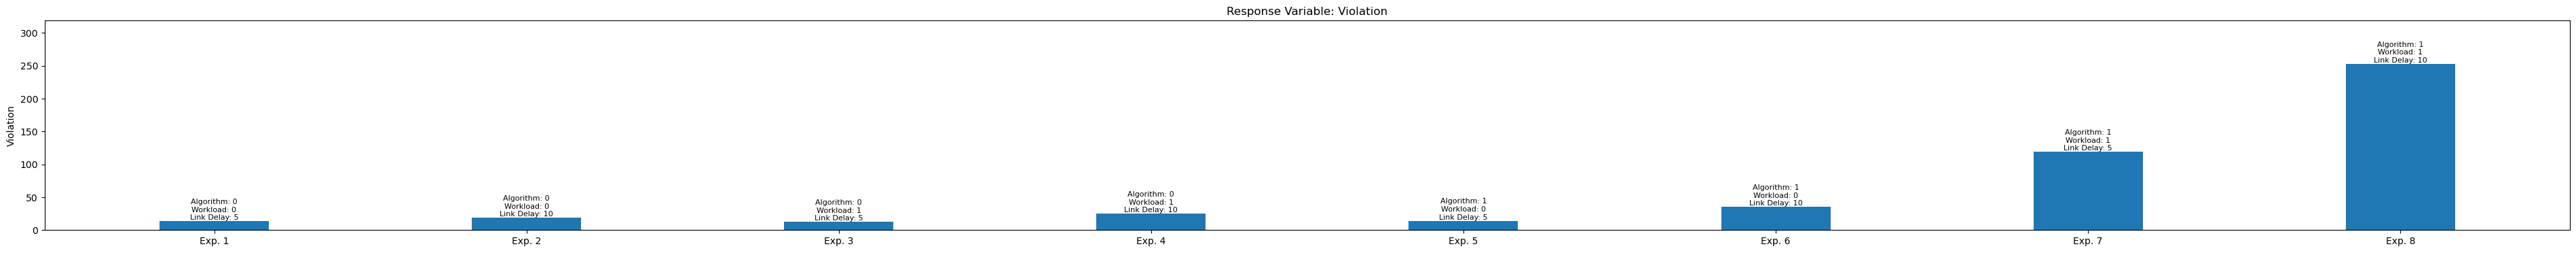

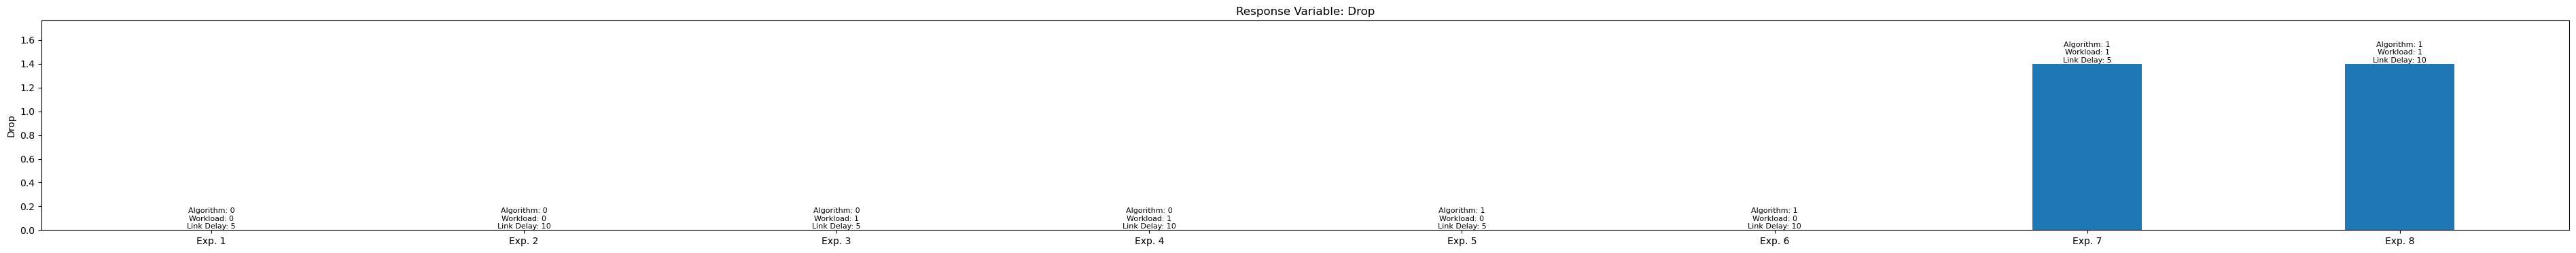

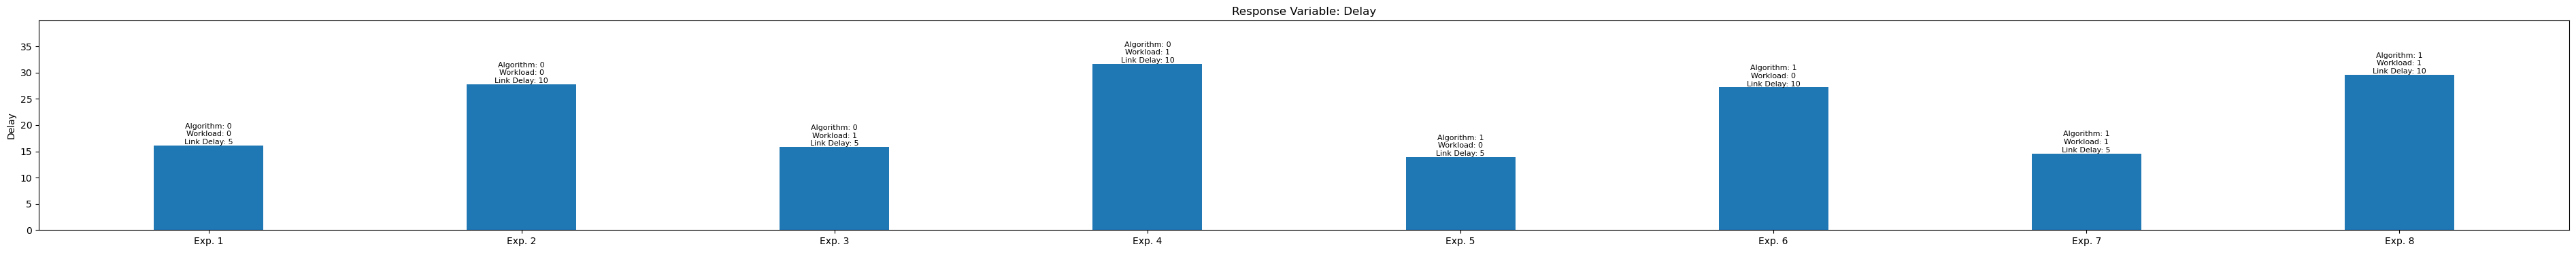

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Adjusting the bar width, if necessary
width = 0.35
n_cols = total_experiments

for var_name in response_vars_names:
    # Increasing the chart height to accommodate labels
    plt.figure(figsize=(6 * n_cols, 4))  # Increasing the second value in figsize to increase the chart height

    n_experiments = len(experiment_settings_real_df)  # Number of experiments
    ind = np.arange(n_experiments)  # Indices for the experiments for bar positioning

    # Plotting the data from the real experiment settings
    bars = plt.bar(ind, experiment_settings_real_df[var_name], width, label='Experiments')

    plt.title(f'Response Variable: {var_name}')  # Chart title
    plt.ylabel(var_name)  # Y-axis label

    # Generating labels for each bar based on factor combinations
    exp_labels = ['Exp. ' + str(exp) for exp in experiment_settings_real_df['Exp']]
    plt.xticks(ind, exp_labels)

    # Adding labels above bars to show factor combinations
    for bar, label in zip(bars, experiment_settings_real_df.to_dict('records')):
        height = bar.get_height()
        comb_label = '\n'.join([f"{k}: {v}" for k, v in label.items() if k in factor_names])
        plt.text(bar.get_x() + bar.get_width() / 2, height, comb_label, ha='center', va='bottom', rotation=0, fontsize=8)

    # Adjusting the Y-axis limits to ensure labels fit without being cut off
    plt.ylim(0, plt.ylim()[1] * 1.2)  # Increases the upper limit of the Y-axis by 20%

    plt.show()


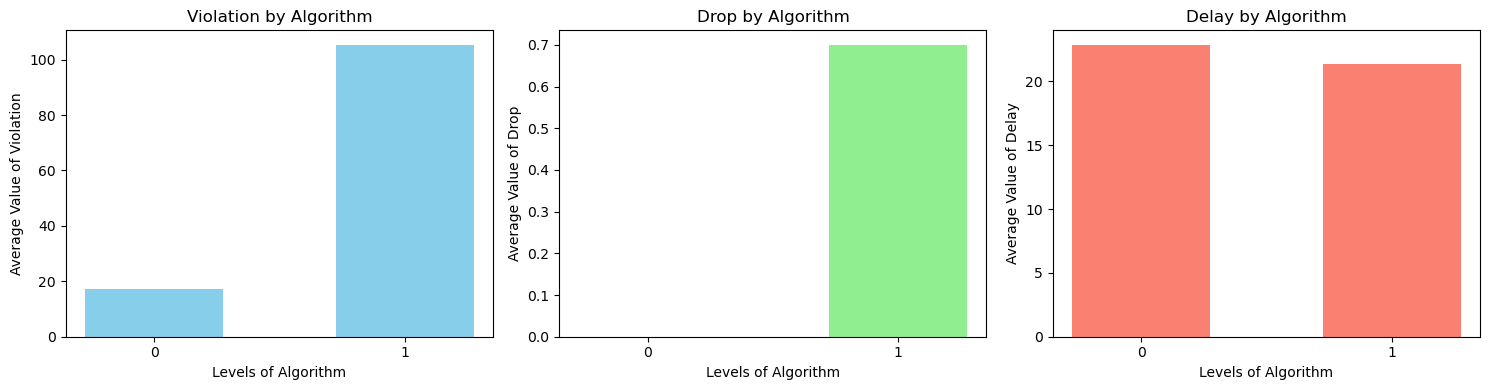

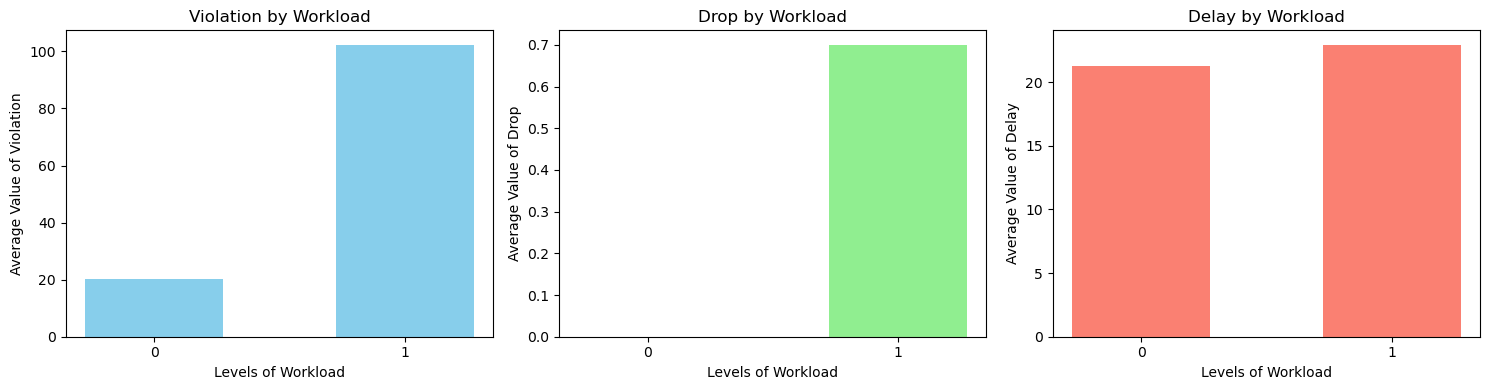

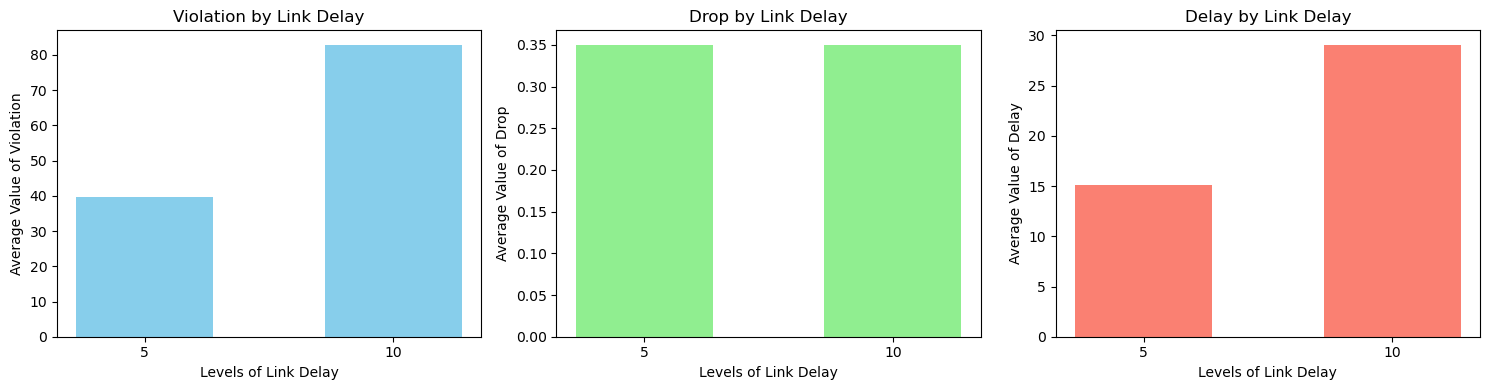

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# Defining a color list for the response variables
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'violet', 'lightgrey', 'orange', 'cyan']

# Bar width
width = 0.55

# Iterating through each factor
for factor_name in factor_names:
    unique_levels = np.sort(experiment_settings_real_df[factor_name].unique())

    # Determining the number of subplots based on the number of response variables
    n_vars = len(response_vars_names)

    # The number of columns equals the number of response variables
    n_cols = n_vars
    # Always 1 row since we are fitting everything in a single horizontal line
    n_rows = 1

    fig, axs = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 4))  # Adjusting size as necessary
    axs = axs.flatten() if n_vars > 1 else [axs]  # Ensures axs is always iterable

    for i, var_name in enumerate(response_vars_names):
        mean_values = []
        # Preparing data for plotting
        for level in unique_levels:
            level_data = experiment_settings_real_df[experiment_settings_real_df[factor_name] == level]
            mean_val = level_data[var_name].mean()
            mean_values.append(mean_val)

        # Bar positions on the X-axis
        ind = np.arange(len(unique_levels))

        # Choosing the color for the current response variable
        bar_color = colors[i % len(colors)]

        # Plotting the bars
        axs[i].bar(ind, mean_values, width, label=f'{var_name}', color=bar_color)

        axs[i].set_title(f'{var_name} by {factor_name}')
        axs[i].set_xticks(ind)
        axs[i].set_xticklabels(unique_levels, rotation=0)  # Adjusting rotation for better visualization if needed
        axs[i].set_xlabel(f'Levels of {factor_name}')
        axs[i].set_ylabel(f'Average Value of {var_name}')
        #axs[i].legend()

    plt.tight_layout()
    plt.show()


In [6]:
# Displaying the tables
print("\nDesign of the Experiment with Coded Levels:")
display(experiment_design_df)
print("\nExperiment Settings with Real Levels:")
display(experiment_settings_real_df)

# Calculating the effects and SS for each response variable
results = calculate_effects_SS_dynamic(experiment_design_df, response_vars_names)

# Printing the formatted results
#print_formatted_results(results)


Design of the Experiment with Coded Levels:


,Exp,Algorithm,Workload,Link Delay,Violation,Drop,Delay,Algorithm:Workload,Algorithm:Link Delay,Workload:Link Delay,Algorithm:Workload:Link Delay
0,1,-1,-1,-1,13.4,0.0,16.13,1,1,1,-1
1,2,-1,-1,1,18.6,0.0,27.77,1,-1,-1,1
2,3,-1,1,-1,12.5,0.0,15.83,-1,1,-1,1
3,4,-1,1,1,24.7,0.0,31.67,-1,-1,1,-1
4,5,1,-1,-1,14.2,0.0,13.90,-1,-1,1,1
5,6,1,-1,1,35.1,0.0,27.18,-1,1,-1,-1
6,7,1,1,-1,118.9,1.4,14.60,1,-1,-1,-1
7,8,1,1,1,253.0,1.4,29.60,1,1,1,1



Experiment Settings with Real Levels:


,Exp,Algorithm,Workload,Link Delay,Violation,Drop,Delay,Algorithm:Workload,Algorithm:Link Delay,Workload:Link Delay,Algorithm:Workload:Link Delay
0,1,0,0,5,13.4,0.0,16.13,1,1,1,-1
1,2,0,0,10,18.6,0.0,27.77,1,-1,-1,1
2,3,0,1,5,12.5,0.0,15.83,-1,1,-1,1
3,4,0,1,10,24.7,0.0,31.67,-1,-1,1,-1
4,5,1,0,5,14.2,0.0,13.90,-1,-1,1,1
5,6,1,0,10,35.1,0.0,27.18,-1,1,-1,-1
6,7,1,1,5,118.9,1.4,14.60,1,-1,-1,-1
7,8,1,1,10,253.0,1.4,29.60,1,1,1,1


/home/mascalmeida/miniconda3/envs/tetris/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


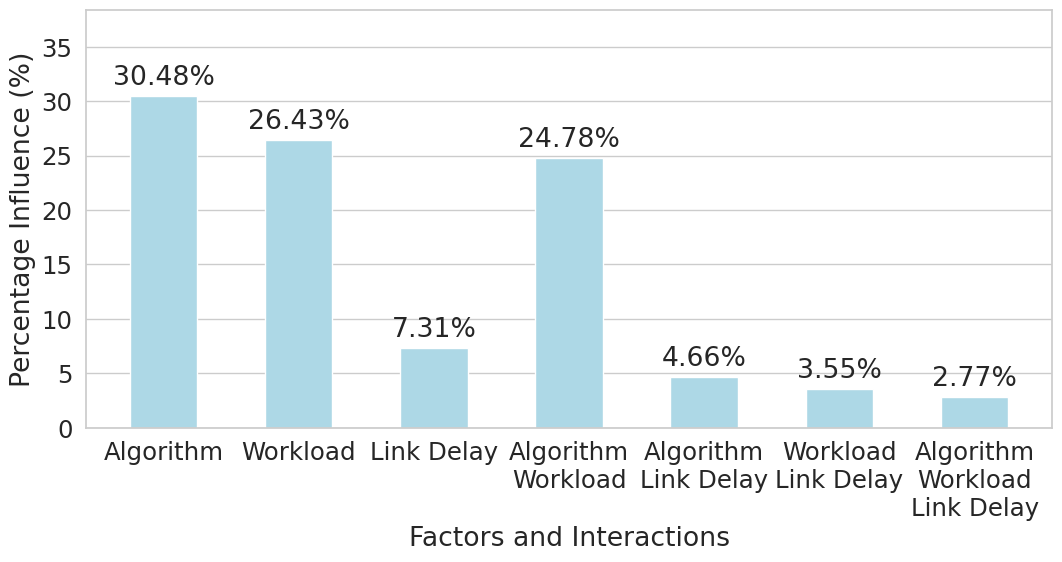

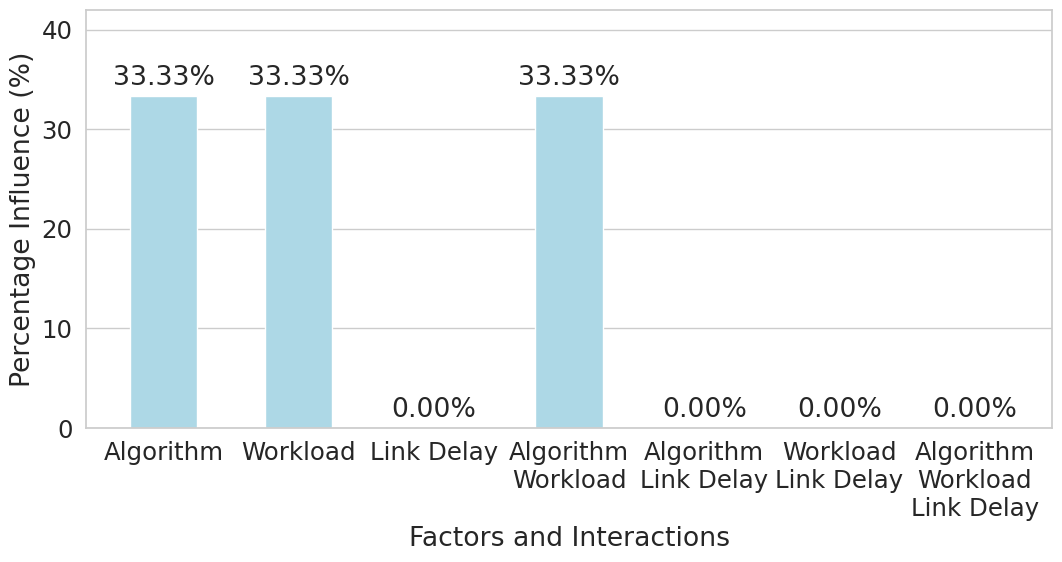

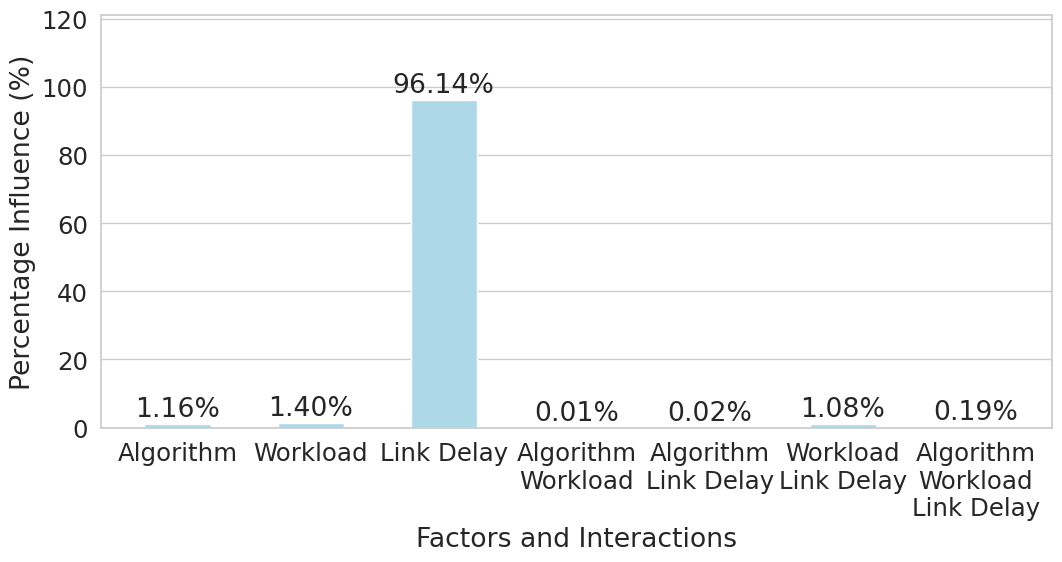

In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Adapted function to plot formatted results
def plot_formatted_results(results):
    sns.set(style="whitegrid", font_scale=1.6)
    for response_var_name, (effects, SS, SST) in results.items():
        # Organizing data for plotting
        names = list(effects.keys())
        influences = [(ss / SST) * 100 for ss in SS.values()]

        # Creating the plot
        plt.figure(figsize=(11, 6))
        plt.grid(axis='x')
        plt.bar(names, influences, color='lightblue', width=0.5)
        #plt.title(f"Percentage Influence of Each Factor and Interaction on {response_var_name}")
        plt.ylabel('Percentage Influence (%)')
        # Adjusting the y-axis limits to ensure labels fit without cutting off
        plt.ylim(0, plt.ylim()[1] * 1.2)  # Increase the upper y-axis limit by 20%
        plt.xlabel('Factors and Interactions')
        #plt.xticks(rotation=15)#, ha="right")
        plt.xticks(range(len(names)), labels=['Algorithm', 'Workload', 'Link Delay',
                                              'Algorithm\nWorkload',
                                              'Algorithm\nLink Delay',
                                              'Workload\nLink Delay',
                                              'Algorithm\nWorkload\nLink Delay'])
        plt.tight_layout()

        # Adding percentage labels above bars
        for i, influence in enumerate(influences):
            plt.text(i, influence + 0.5, f"{influence:.2f}%", ha='center', va='bottom')

        plt.savefig(f"plots/influence_on_{response_var_name}.png", dpi=300)
        plt.savefig(f"plots/influence_on_{response_var_name}.pdf", format='pdf')
        plt.show()

# Assuming 'results' has been previously calculated by the provided code
# results = calculate_effects_SS_dynamic(experiment_design_df, response_vars_names)
# Printing formatted results
# print_formatted_results(results)
# Calling the adapted function to plot the results
plot_formatted_results(results)

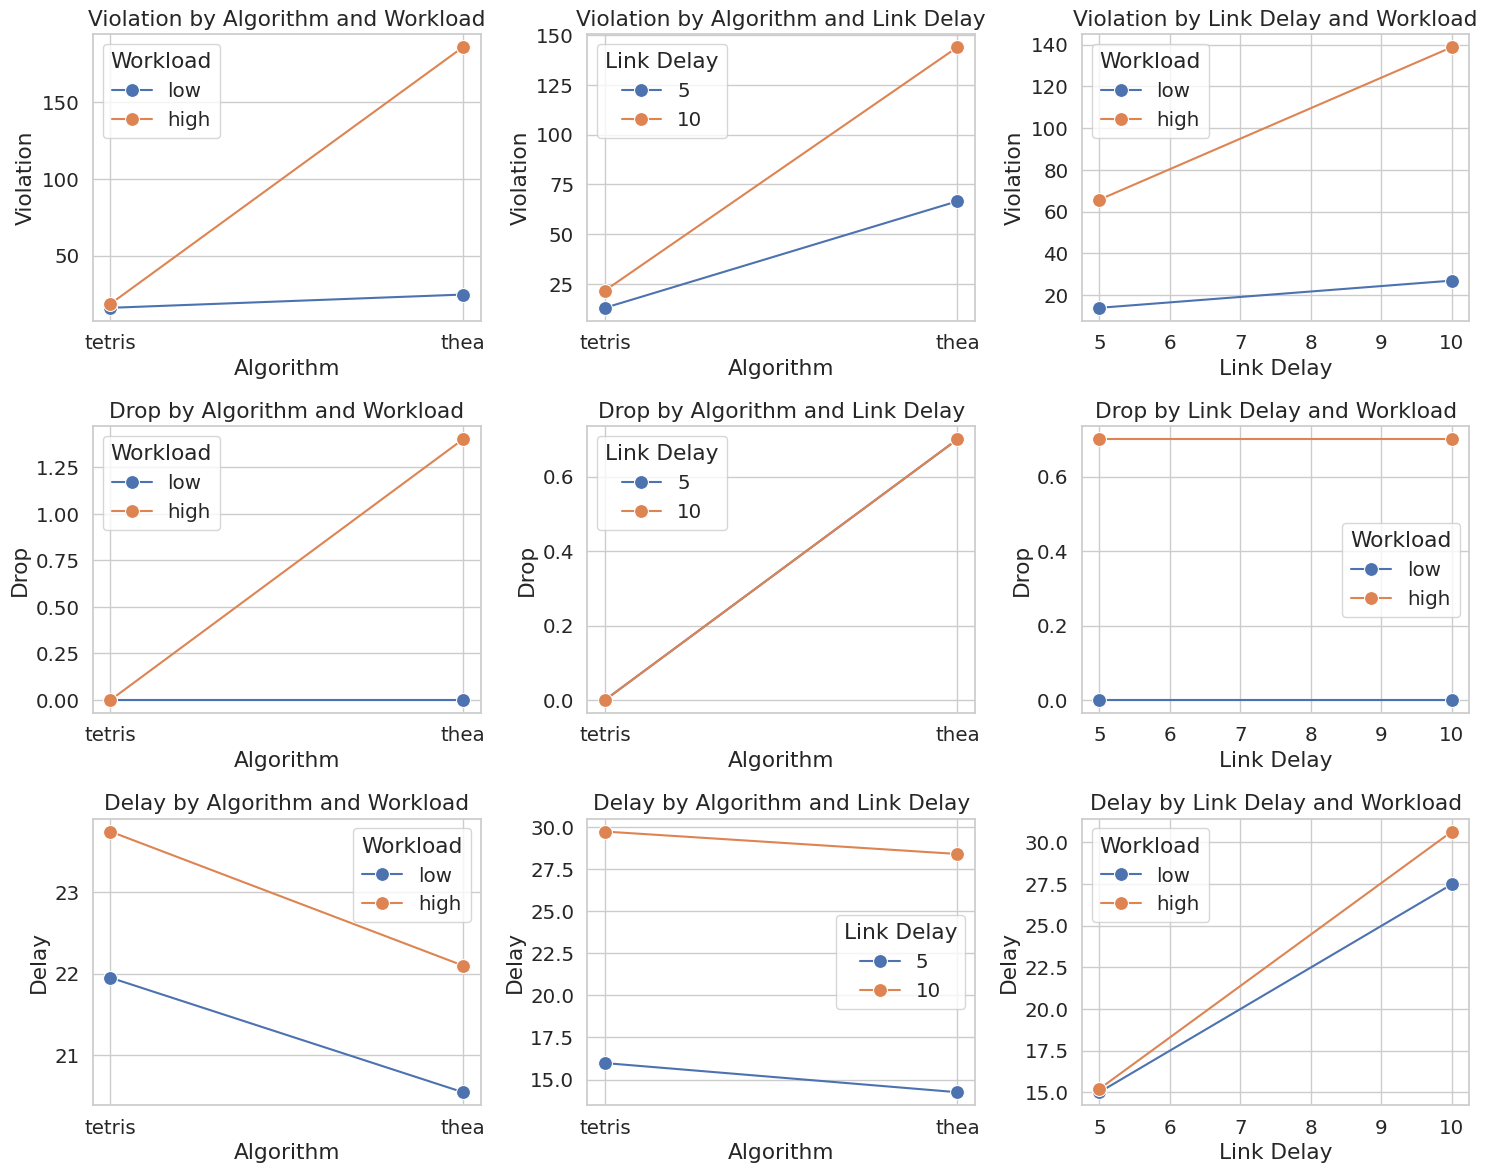

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_interaction_matrix_subplot(df, response_vars_names, factor_names):
    sns.set(style="whitegrid", font_scale=1.3)

    # Determining the number of subplots needed based on the number of factor combinations
    num_factors = len(factor_names)
    num_combinations = num_factors * (num_factors - 1) // 2
    num_rows = len(response_vars_names)
    num_cols = max(1, num_combinations)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    if num_rows == 1:
        axes = [axes]
    if num_cols == 1:
        axes = np.array([axes]).transpose()

    for i, response_var_name in enumerate(response_vars_names):
        ax_index = 0

        for factor1 in factor_names:
            for factor2 in factor_names:
                if factor1 < factor2:  # Ensuring we don't repeat combinations
                    # Filtering data for the two factors and the current response variable
                    plot_data = df[[factor1, factor2, response_var_name]].dropna()

                    # Selecting the correct subplot
                    ax = axes[i, ax_index] if num_rows > 1 else axes[ax_index]

                    # Creating the interaction plot
                    interaction_plot = sns.lineplot(x=factor1, y=response_var_name, hue=factor2, data=plot_data,
                                                    marker='o', linestyle='-', markersize=10, errorbar=None, ax=ax,
                                                    palette=sns.color_palette()[0:2])
                    interaction_plot.set_title(f'{response_var_name} by {factor1} and {factor2}')
                    interaction_plot.set_xlabel(factor1)
                    interaction_plot.set_ylabel(response_var_name)

                    # interaction_plot.set_xlabel(None)
                    # interaction_plot.set_ylabel(None)

                    ax.legend(title=factor2)

                    ax_index += 1

    plt.tight_layout()
    # plt.savefig(f"plots/influence_for_all.png", dpi=300)
    # plt.savefig(f"plots/influence_for_all.pdf", format='pdf')
    plt.show()

# Adjusted function call
for factor in factor_names:
    if factor in ['Algo', 'Algorithm']:
        experiment_settings_real_df.loc[:, factor] = experiment_settings_real_df.loc[:, factor].replace(0, 'tetris').replace(1, 'thea')
    if factor in ['Load', 'Workload']:
        experiment_settings_real_df.loc[:, factor] = experiment_settings_real_df.loc[:, factor].replace(0, 'low').replace(1, 'high')
    if factor in ['Net', 'Link Delay']:
        experiment_settings_real_df.loc[:, factor] = experiment_settings_real_df.loc[:, factor].replace(0, 5).replace(1, 10)
plot_interaction_matrix_subplot(experiment_settings_real_df, response_vars_names, factor_names)

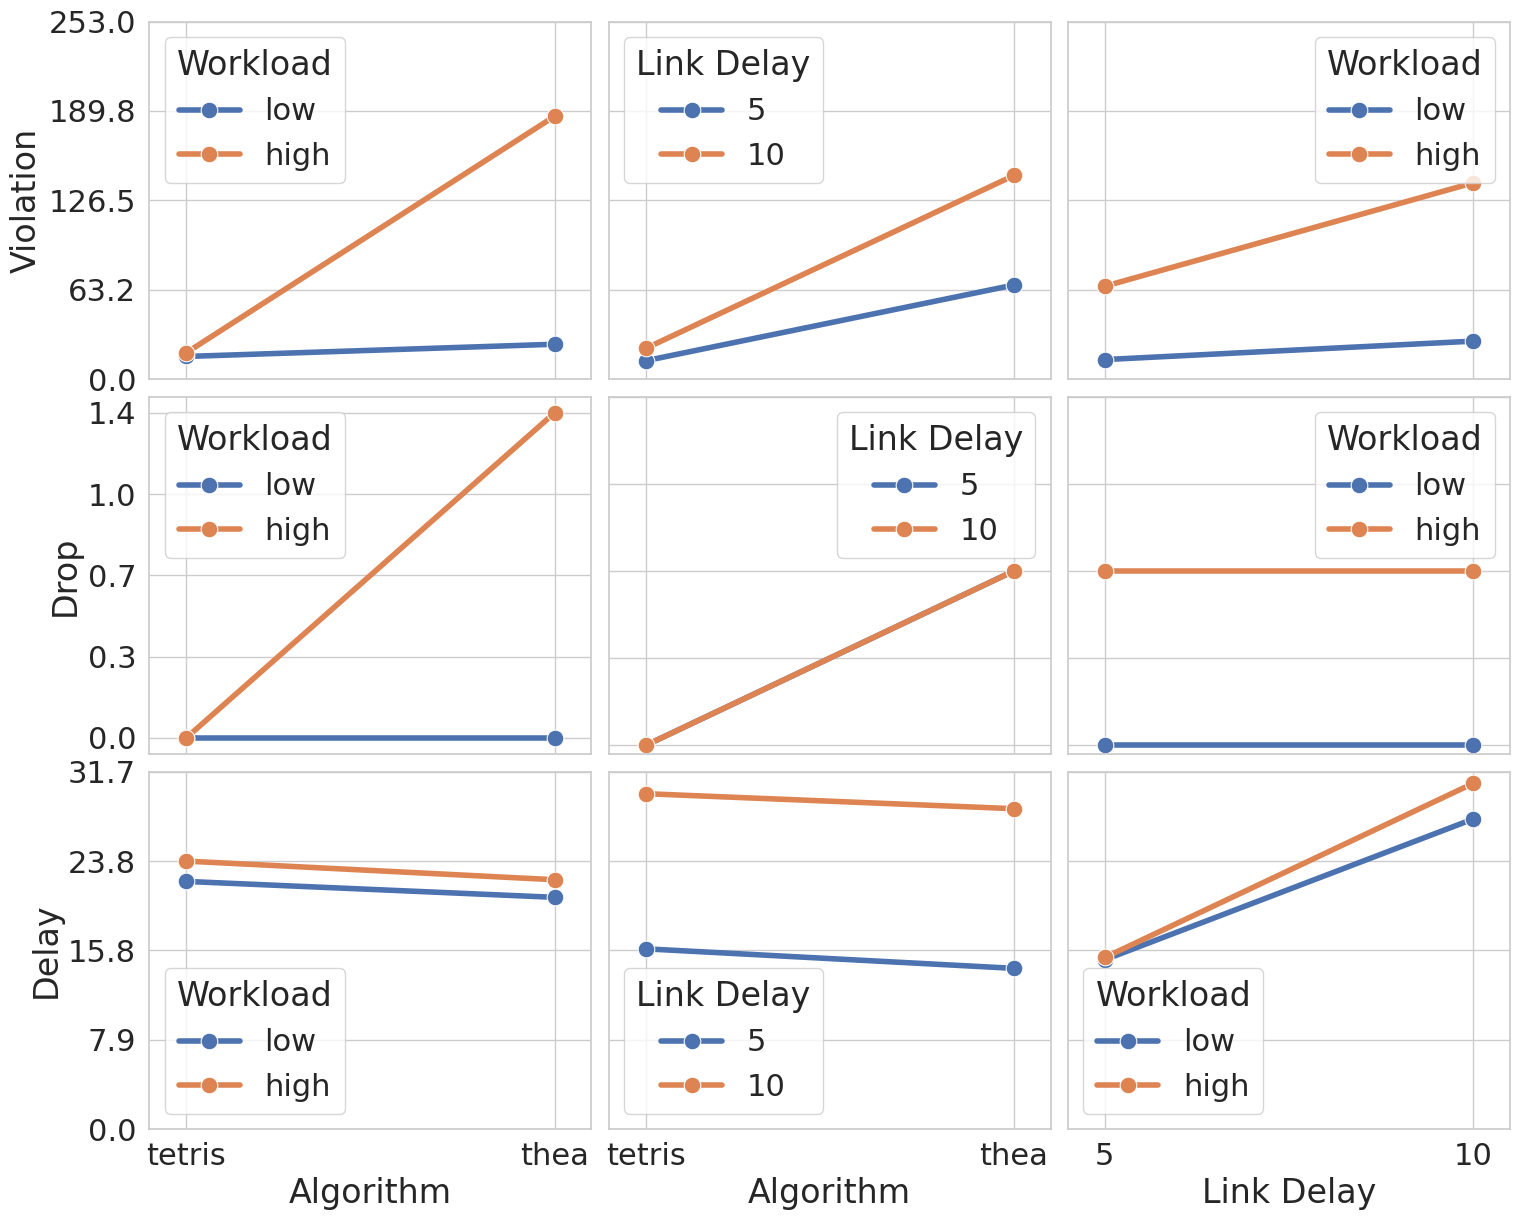

,Exp,Algorithm,Workload,Link Delay,Violation,Drop,Delay,Algorithm:Workload,Algorithm:Link Delay,Workload:Link Delay,Algorithm:Workload:Link Delay
0,1,tetris,low,5,13.4,0.0,16.13,1,1,1,-1
1,2,tetris,low,10,18.6,0.0,27.77,1,-1,-1,1
2,3,tetris,high,5,12.5,0.0,15.83,-1,1,-1,1
3,4,tetris,high,10,24.7,0.0,31.67,-1,-1,1,-1
4,5,thea,low,5,14.2,0.0,13.90,-1,-1,1,1
5,6,thea,low,10,35.1,0.0,27.18,-1,1,-1,-1
6,7,thea,high,5,118.9,1.4,14.60,1,-1,-1,-1
7,8,thea,high,10,253.0,1.4,29.60,1,1,1,1


In [9]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def plot_interaction_matrix_subplot(df, response_vars_names, factor_names):
    sns.set(style="whitegrid", font_scale=2)
    # Determining the number of subplots needed based on the number of factor combinations
    num_factors = len(factor_names)
    num_combinations = num_factors * (num_factors - 1) // 2
    num_rows = len(response_vars_names)
    num_cols = max(1, num_combinations)

    fig, axes = plt.subplots(num_rows, num_cols, figsize=(5 * num_cols, 4 * num_rows))
    if num_rows == 1:
        axes = [axes]
    if num_cols == 1:
        axes = np.array([axes]).transpose()

    for i, response_var_name in enumerate(response_vars_names):
        ax_index = 0

        for factor1 in factor_names:
            for factor2 in factor_names:
                if factor1 < factor2:  # Ensuring we don't repeat combinations
                    # Filtering data for the two factors and the current response variable
                    plot_data = df[[factor1, factor2, response_var_name]].dropna()

                    # print(f'{response_var_name} by {factor1} and {factor2}')
                    # print(plot_data)

                    # Selecting the correct subplot
                    ax = axes[i, ax_index] if num_rows > 1 else axes[ax_index]

                    # Creating the interaction plot
                    interaction_plot = sns.lineplot(x=factor1, y=response_var_name, hue=factor2, data=plot_data,
                                                    marker='o', markersize=12, linestyle='-', linewidth = 4, 
                                                    errorbar=None, ax=ax, palette=sns.color_palette()[0:2])
                    # interaction_plot.set_title(f'{response_var_name} by {factor1} and {factor2}')
                    interaction_plot.set_xlabel(factor1)
                    interaction_plot.set_ylabel(response_var_name)

                    interaction_plot.set_xlabel(None)
                    interaction_plot.set_ylabel(None)
                    interaction_plot.set_xticks(df[factor1].unique())

                    interaction_plot.margins(x=0.1)

                    interaction_plot.set_yticks(np.linspace(0, df[response_var_name].max(), num=5))
                    interaction_plot.set_yticklabels([])

                    # print(f'i: {i}, ax_index:{np.linspace(df[response_var_name].min(), df[response_var_name].max())}')

                    if ax_index==0:
                       interaction_plot.set_ylabel(response_var_name)
                       interaction_plot.set_yticklabels(
                           f'{val:.1f}' for val in np.linspace(0, df[response_var_name].max(), num=5)
                           )


                    if i==2:
                      interaction_plot.set_xlabel(factor1)
                    else:
                      interaction_plot.set_xticklabels([])

                    ax.legend(title=factor2)

                    ax_index += 1

    plt.tight_layout(pad=0)
    plt.savefig(f"plots/influence_for_all.png", dpi=300)
    plt.savefig(f"plots/influence_for_all.pdf", format='pdf')
    plt.show()

# Adjusted function call
for factor in factor_names:
    if factor in ['Algo', 'Algorithm']:
        experiment_settings_real_df.loc[:, factor] = experiment_settings_real_df.loc[:, factor].replace(0, 'tetris').replace(1, 'thea')
    if factor in ['Load', 'Workload']:
        experiment_settings_real_df.loc[:, factor] = experiment_settings_real_df.loc[:, factor].replace(0, 'low').replace(1, 'high')
    if factor in ['Net', 'Link Delay']:
        experiment_settings_real_df.loc[:, factor] = experiment_settings_real_df.loc[:, factor].replace(0, 5).replace(1, 10)

plot_interaction_matrix_subplot(experiment_settings_real_df, response_vars_names, factor_names)
experiment_settings_real_df